<ipython-input-1-bf06f21eade3>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['target_filled_forward'] = data['target'].fillna(method='ffill')


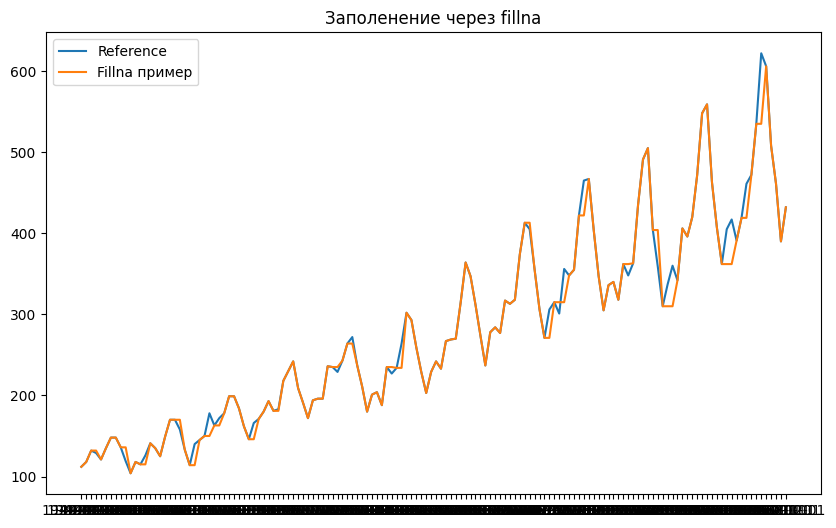

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Заполнение через fillna
data = pd.read_csv('/content/drive/MyDrive/passengers2.csv')

data['target_filled_forward'] = data['target'].fillna(method='ffill')

plt.figure(figsize=(10, 6))
plt.plot(data['Month'],data['reference'], label='Reference')
plt.plot(data['Month'], data['target_filled_forward'], label='Fillna пример')
plt.legend()
plt.title('Заполенение через fillna')
plt.show()


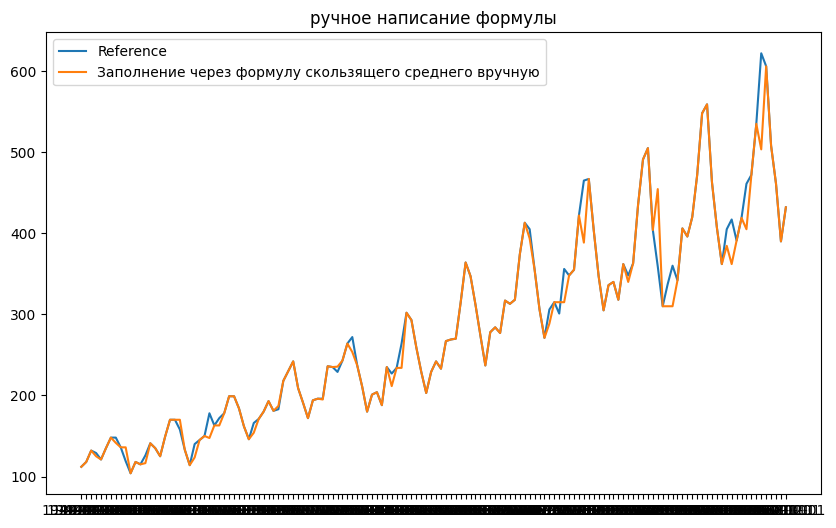

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Заполнение с помощью скользящего среднего с использованием формулы

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/passengers2.csv')

def rolling_mean_formula(series, window):
    smoothed = series.copy()
    for i in range(window - 1, len(series)):
        if pd.isna(series[i]):
            smoothed[i] = np.mean(series[i-window+1:i+1])
        else:
            smoothed[i] = series[i]
    return smoothed

window = 3
data['target_rolling_mean_formula'] = rolling_mean_formula(data['target'], window)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='Reference')
plt.plot(data['Month'], data['target_rolling_mean_formula'], label='Заполнение через формулу скользящего среднего вручную')
plt.legend()
plt.title('ручное написание формулы')
plt.show()


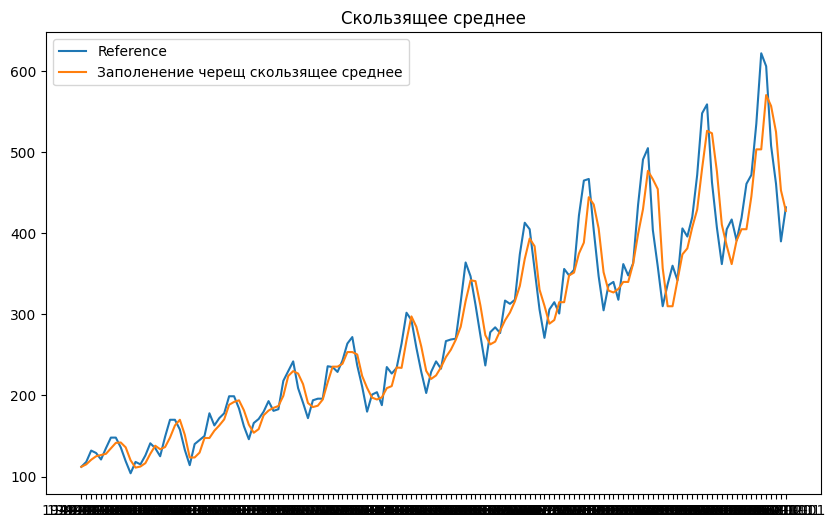

In [8]:
# Заполнение через padnas
window = 3
data['target_rolling_mean_formula'] = data['target'].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='Reference')
plt.plot(data['Month'], data['target_rolling_mean_formula'], label='Заполенение черещ скользящее среднее')
plt.legend()
plt.title('Скользящее среднее')
plt.show()


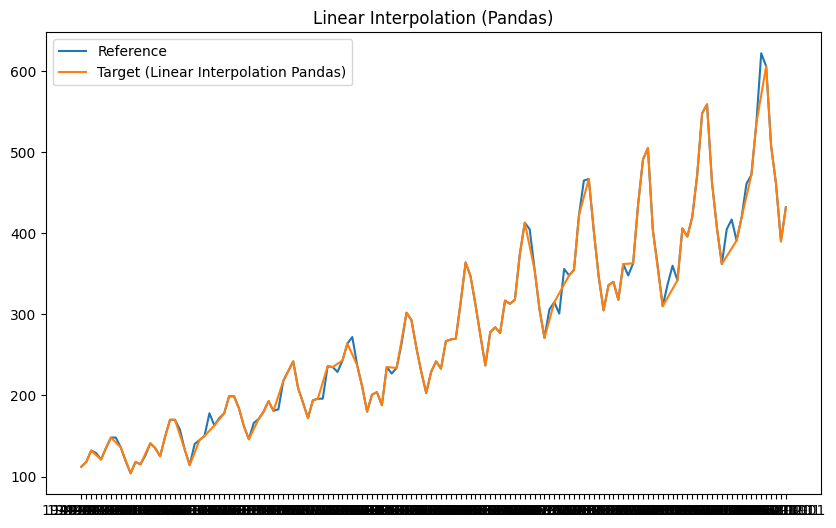

In [13]:
# интерполяция

# Интерполяция (линейная) с использованием формулы
def linear_interpolation(series):
    series = series.copy()
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            x0, y0 = i - 1, series[i - 1]
            x1, y1 = i + 1, series[i + 1]
            x = i
            y = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
            series[i] = y
    return series

data['target_linear_interpolation_formula'] = linear_interpolation(data['target'])

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='Reference')
plt.plot(data['Month'], data['target_linear_interpolation_pandas'], label='Target (Linear Interpolation Pandas)')
plt.legend()
plt.title('Linear Interpolation (Pandas)')
plt.show()


<ipython-input-14-7ae070a50b3a>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['target_filled_forward'] = data['target'].fillna(method='ffill')


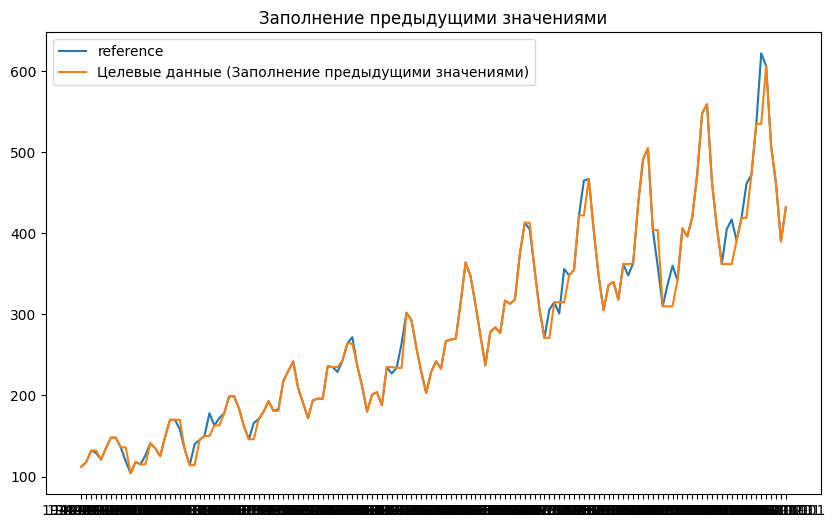

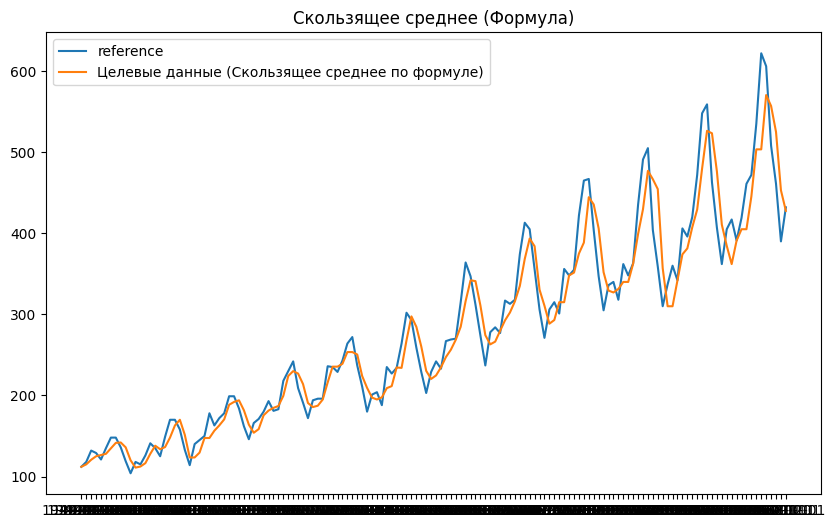

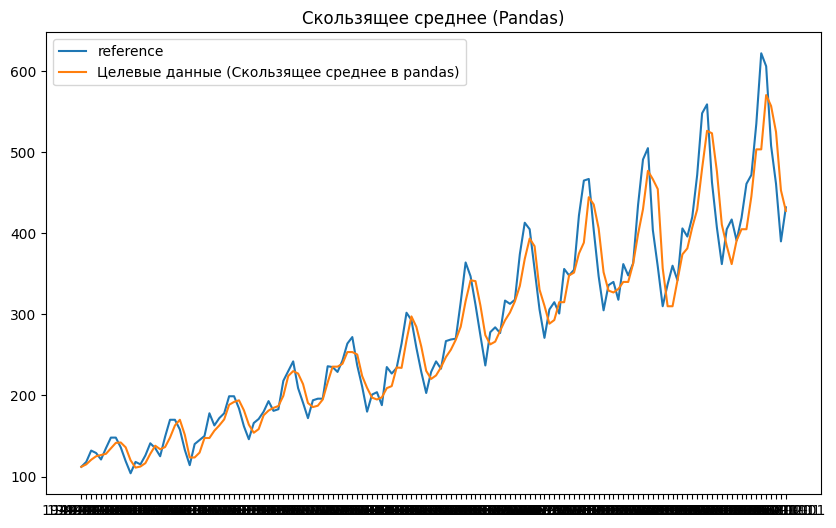

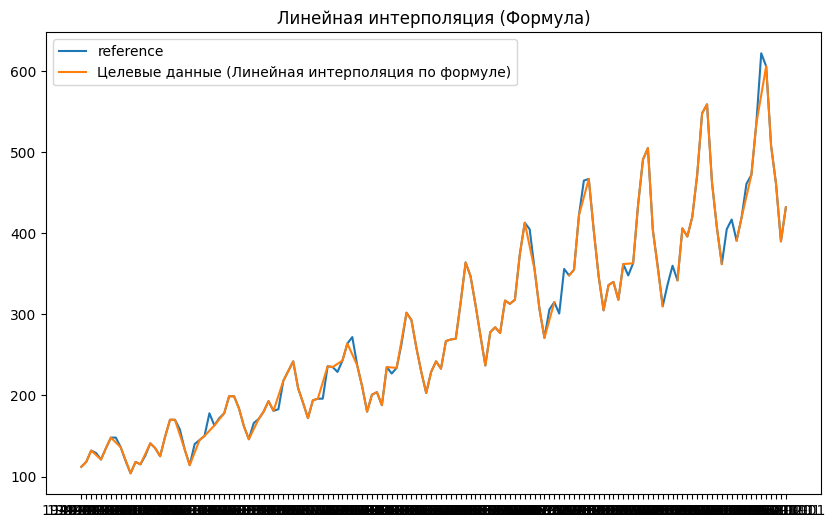

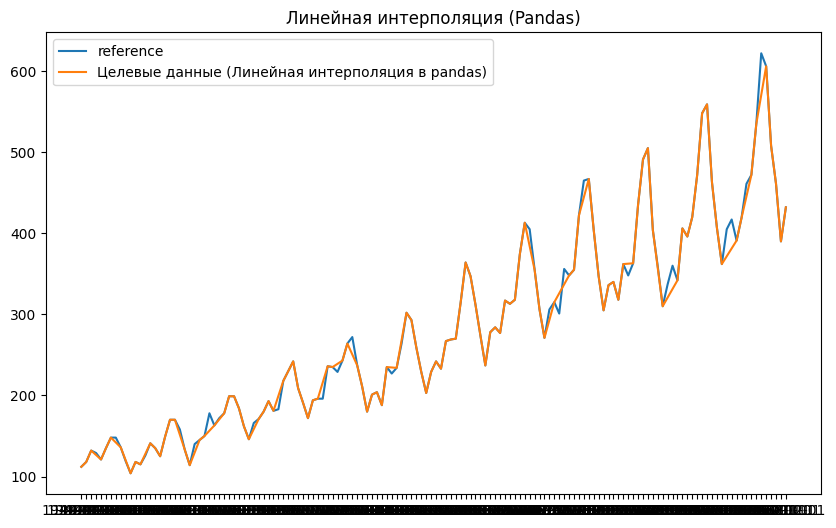

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/passengers2.csv')
data['target_filled_forward'] = data['target'].fillna(method='ffill')

window = 3
data['target_rolling_mean_formula'] = data['target'].rolling(window=window, min_periods=1).mean()
data['target_rolling_mean_pandas'] = data['target'].rolling(window=window, min_periods=1).mean()

def linear_interpolation(series):
    series = series.copy()
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            x0, y0 = i - 1, series[i - 1]
            x1, y1 = i + 1, series[i + 1]
            x = i
            y = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
            series[i] = y
    return series

data['target_linear_interpolation_formula'] = linear_interpolation(data['target'])
data['target_linear_interpolation_pandas'] = data['target'].interpolate(method='linear')

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='reference')
plt.plot(data['Month'], data['target_filled_forward'], label='Целевые данные (Заполнение предыдущими значениями)')
plt.legend()
plt.title('Заполнение предыдущими значениями')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='reference')
plt.plot(data['Month'], data['target_rolling_mean_formula'], label='Целевые данные (Скользящее среднее по формуле)')
plt.legend()
plt.title('Скользящее среднее (Формула)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='reference')
plt.plot(data['Month'], data['target_rolling_mean_pandas'], label='Целевые данные (Скользящее среднее в pandas)')
plt.legend()
plt.title('Скользящее среднее (Pandas)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='reference')
plt.plot(data['Month'], data['target_linear_interpolation_formula'], label='Целевые данные (Линейная интерполяция по формуле)')
plt.legend()
plt.title('Линейная интерполяция (Формула)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='reference')
plt.plot(data['Month'], data['target_linear_interpolation_pandas'], label='Целевые данные (Линейная интерполяция в pandas)')
plt.legend()
plt.title('Линейная интерполяция (Pandas)')
plt.show()


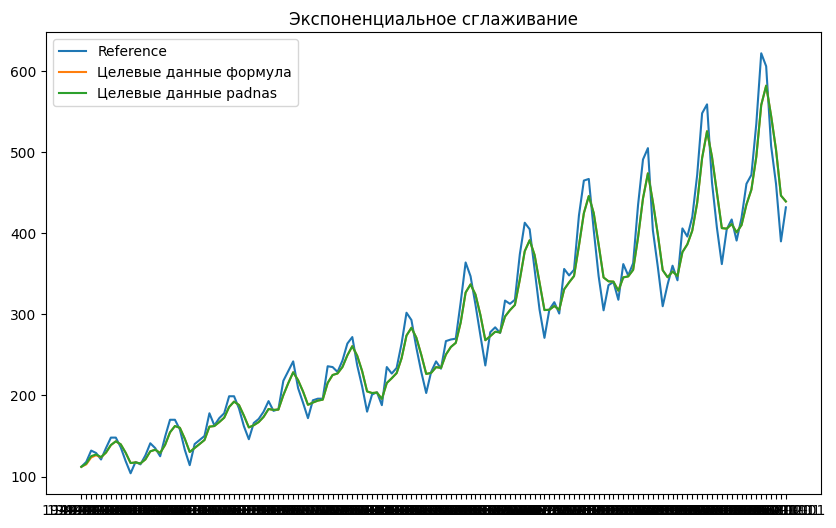

In [16]:
# сглаживание через экспоненту
def exponential_smoothing(series, alpha):
    smoothed = [series[0]]
    for t in range(1, len(series)):
        smoothed.append(alpha * series[t] + (1 - alpha) * smoothed[t - 1])
    return smoothed

alpha = 0.5
data['reference_smoothed_formula'] = exponential_smoothing(data['reference'], alpha)

# Сглаживание данных с помощью метода ewm и mean в pandas
data['reference_smoothed_pandas'] = data['reference'].ewm(alpha=alpha).mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['reference'], label='Reference')
plt.plot(data['Month'], data['reference_smoothed_formula'], label='Целевые данные формула')
plt.plot(data['Month'], data['reference_smoothed_pandas'], label='Целевые данные padnas')
plt.legend()
plt.title('Экспоненциальное сглаживание')
plt.show()
